In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import math
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
def load_dataset(path):
    images = []
    labels = []

    for person_name in os.listdir(path):
        person_dir = os.path.join(path, person_name)

        if os.path.isdir(person_dir):
            for image_name in os.listdir(person_dir):
                image_path = os.path.join(person_dir, image_name)
                image = cv2.imread(image_path)

                if image is None:
                    continue

                images.append(image)
                labels.append(person_name)

    return images, labels

In [7]:
folder1 = '/content/drive/MyDrive/Project  Face recognition/Demo/ATM images'
images, labels = load_dataset(folder1)

In [8]:
def create_image_dict(images, labels):
    image_dict = {}
    for label, image in zip(labels, images):
        if label not in image_dict:
            image_dict[label] = [image]
    return image_dict

In [9]:
organized_images = create_image_dict(images, labels)

In [10]:
def show_one_image_per_label(organized_images):
    labels = list(organized_images.keys())
    num_labels = len(labels)

    cols = 3
    rows = (num_labels + cols - 1) // cols

    plt.figure(figsize=(8, rows * 2.5))

    selected_images = []

    for i, label in enumerate(labels, 1):
        images = organized_images[label]
        if images:
            image = images[0]
            selected_images.append(image)
            plt.subplot(rows, cols, i)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(label)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    return selected_images

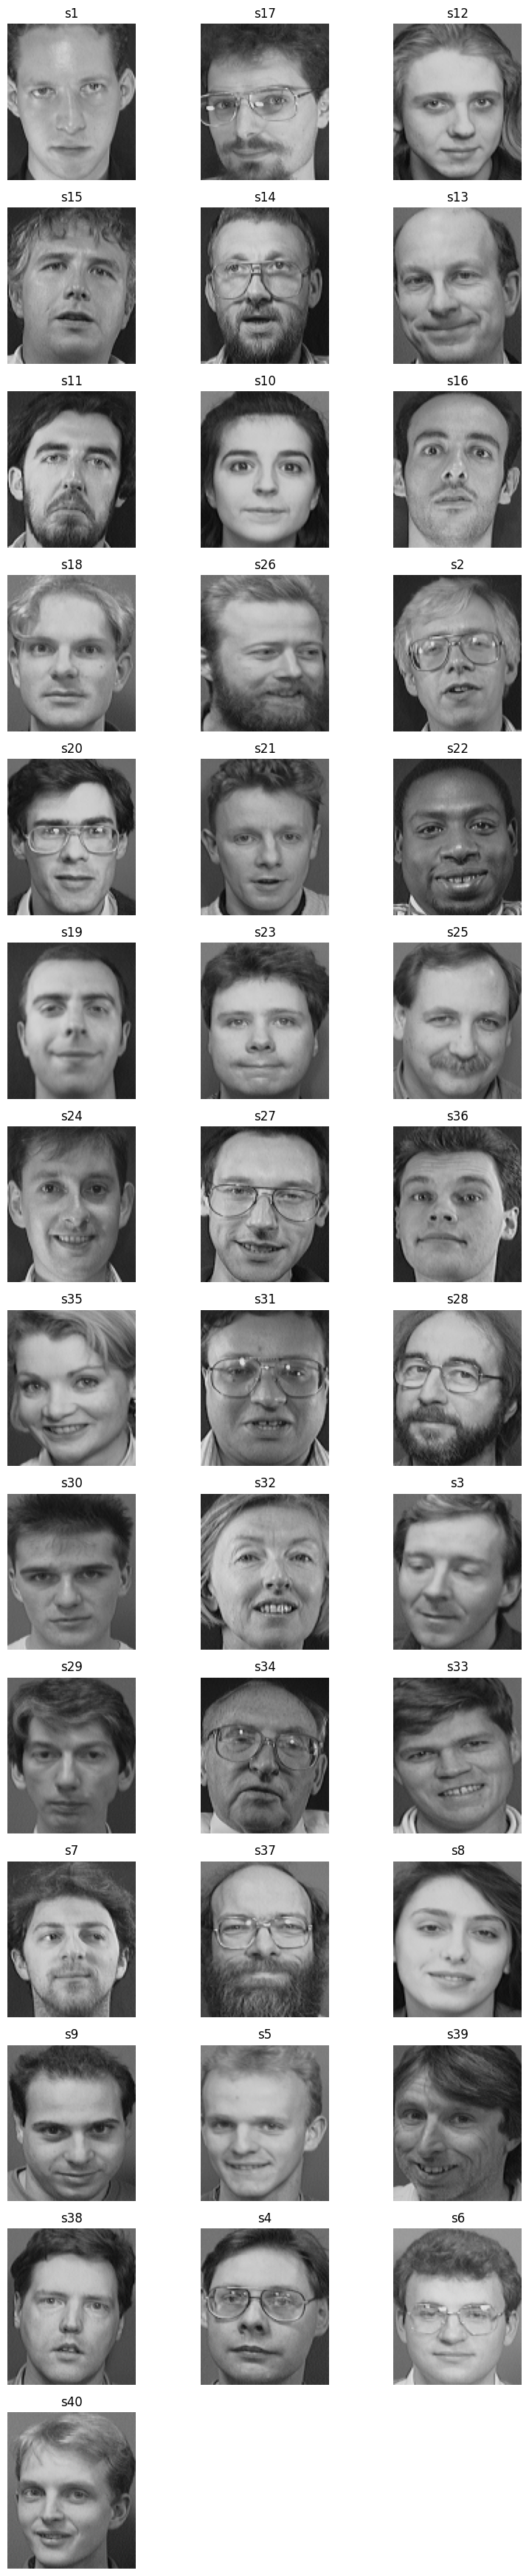

In [11]:
images_set = show_one_image_per_label(organized_images)

In [6]:
cascade_path = '/content/drive/MyDrive/Project  Face recognition/Demo/haarcascade_frontalface_default (1).xml'

In [7]:
face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')

In [8]:
from google.colab.patches import cv2_imshow

def detect_faces(images):
    for label, images in organized_images.items():
        face_detected = False
        print(f"Processing label: {label}")
        for image in images:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

            if len(faces) > 0:
                x, y, w, h = faces[0]
                cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
                cv2_imshow(image)
                face_detected = True
                break

        if not face_detected:
            print(f"No faces detected for label: {label}")

Processing label: s1


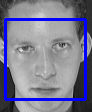

Processing label: s17
No faces detected for label: s17
Processing label: s12


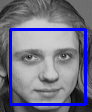

Processing label: s15


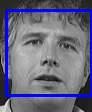

Processing label: s14


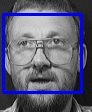

Processing label: s13


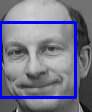

Processing label: s11


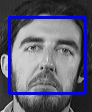

Processing label: s10


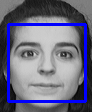

Processing label: s16


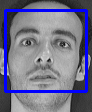

Processing label: s18


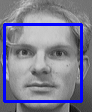

Processing label: s26
No faces detected for label: s26
Processing label: s2
No faces detected for label: s2
Processing label: s20


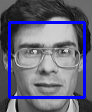

Processing label: s21


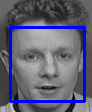

Processing label: s22


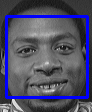

Processing label: s19


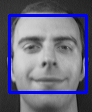

Processing label: s23


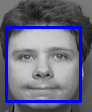

Processing label: s25


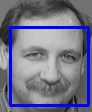

Processing label: s24


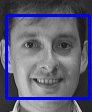

Processing label: s27


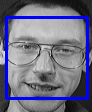

Processing label: s36
No faces detected for label: s36
Processing label: s35


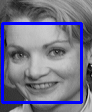

Processing label: s31
No faces detected for label: s31
Processing label: s28
No faces detected for label: s28
Processing label: s30


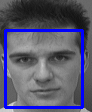

Processing label: s32


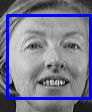

Processing label: s3


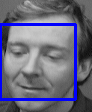

Processing label: s29


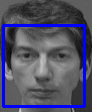

Processing label: s34
No faces detected for label: s34
Processing label: s33


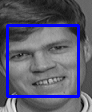

Processing label: s7


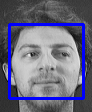

Processing label: s37


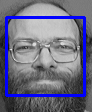

Processing label: s8


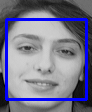

Processing label: s9


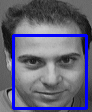

Processing label: s5


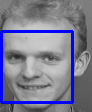

Processing label: s39
No faces detected for label: s39
Processing label: s38


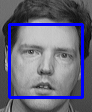

Processing label: s4


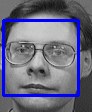

Processing label: s6


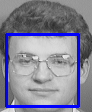

Processing label: s40


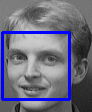

In [16]:
detect_faces(images_set)

In [3]:
def load_images(folder):
    images = {}
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images[filename] = img
    return images


In [4]:
folder = '/content/drive/MyDrive/Project  Face recognition/Demo/WIDER images/12--Group'
images = load_images(folder)

In [5]:
print(f"Loaded {len(images)} images.")

Loaded 582 images.


In [17]:
def detect_faces1(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2_imshow(image)


In [9]:
def show_image(image):
    plt.figure(figsize=(18,15))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

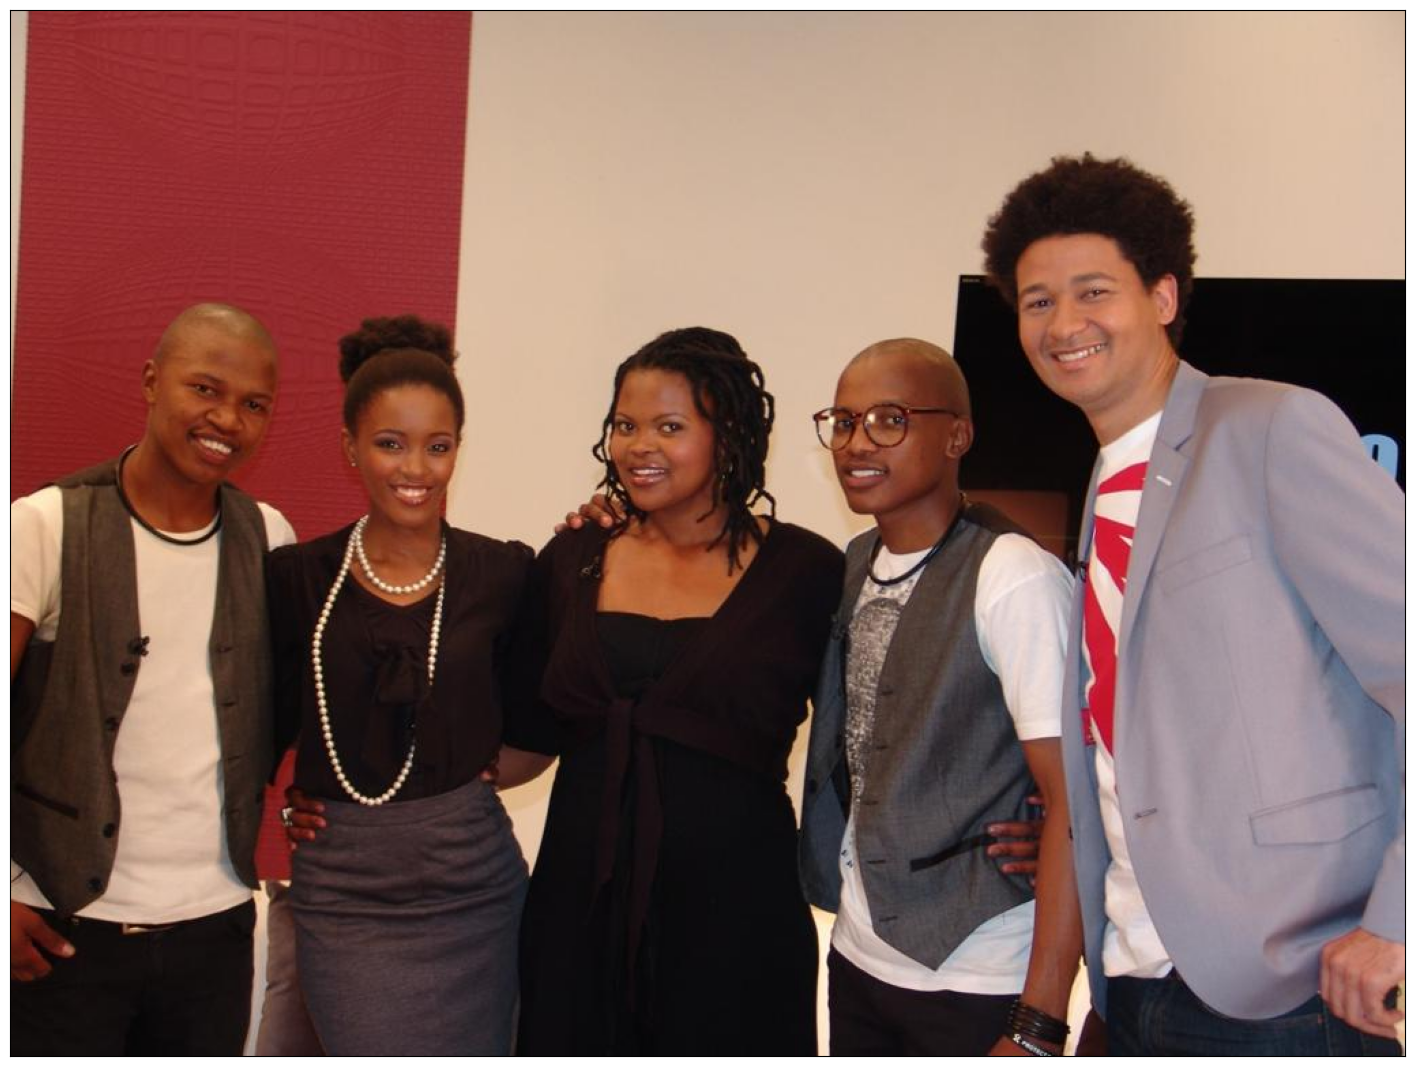

In [15]:
image_name = '12_Group_Group_12_Group_Group_12_122.jpg'
image_122 = images[image_name]
show_image(image_122)

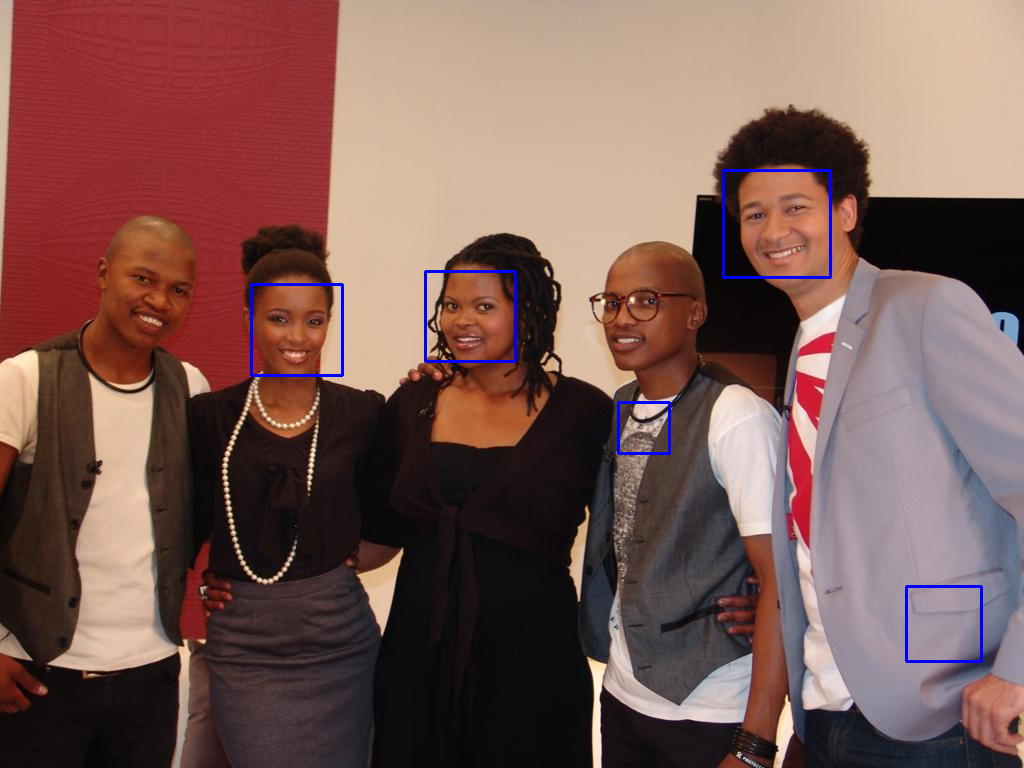

In [18]:
detect_faces1(image_122)


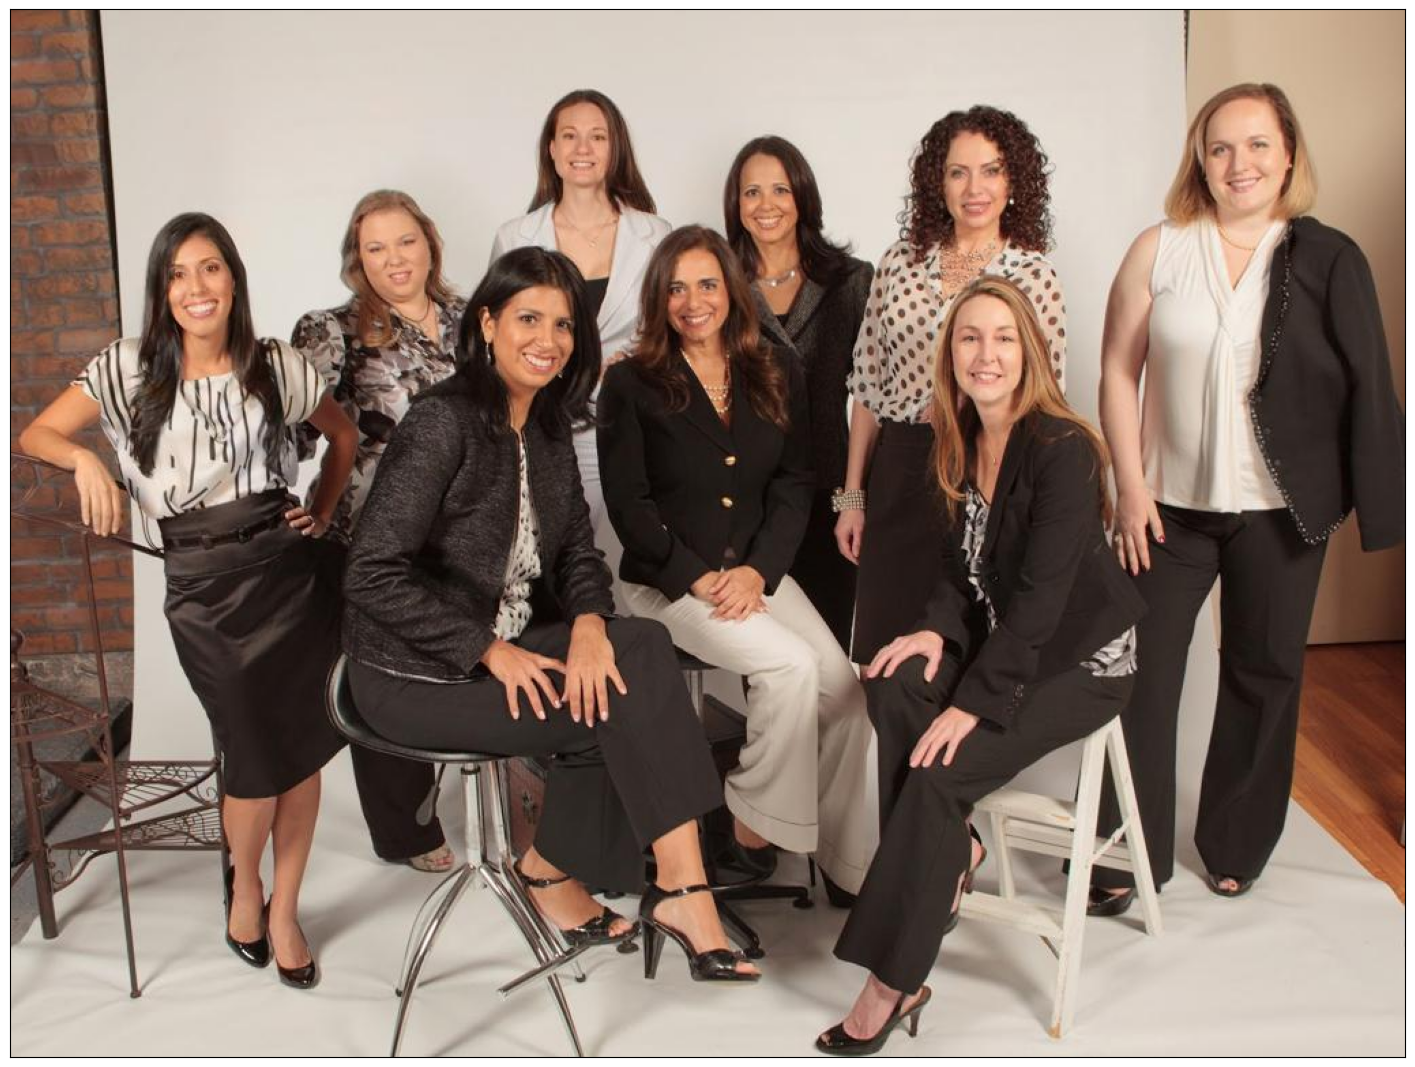

In [22]:
image_name = '12_Group_Group_12_Group_Group_12_11.jpg'
image_11 = images[image_name]
show_image(image_11)

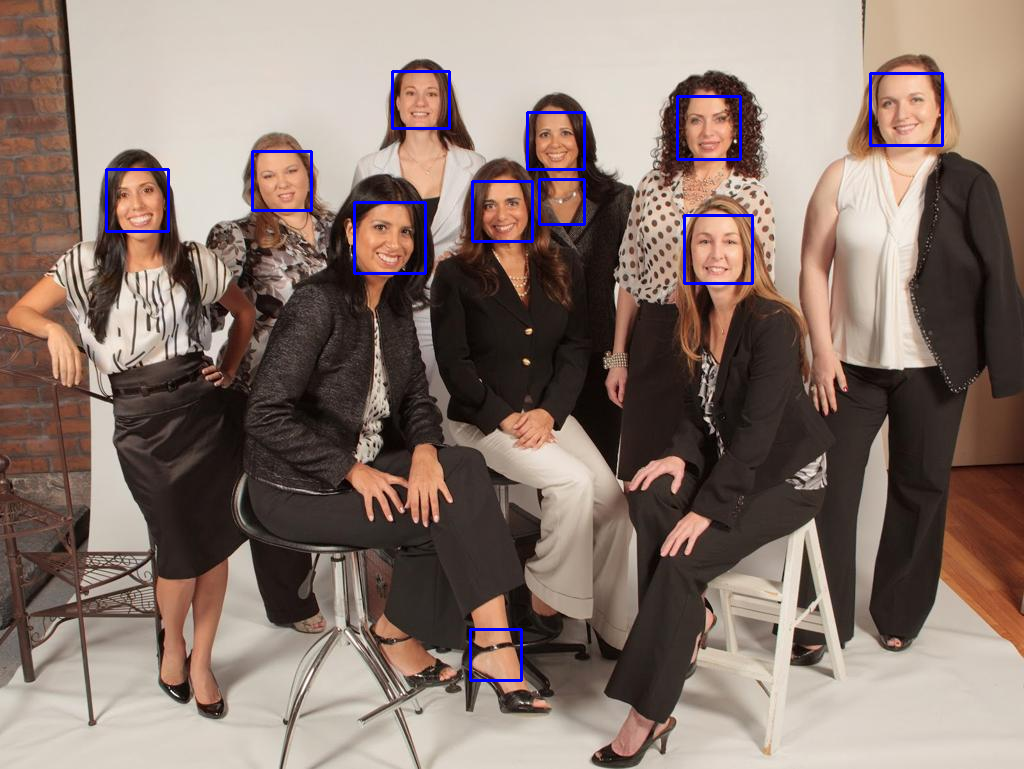

In [23]:
detect_faces1(image_11)
